# AA228 Final Project: Lunar Lander
#### Kapil Dheeriya, Cole Robins, Ashley Davidson
Fall 2024

In [25]:
import numpy as np
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import collections
%matplotlib inline
#import torch
#run pip install gym and pip install gym[box2d] in terminal
seed_num = 42

Random Lunar Lander

In [23]:
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env.action_space.seed(seed_num)
def ll_random(env, num_iter, max_steps=1000, render=False):
    #List of total rewards over iterations
    rewards = []

    for i in range(num_iter):
        #Reset env
        obs, info = env.reset()
        iter_reward = 0
        num_steps = 0

        #Take steps until termination condition
        while num_steps < max_steps:
            #Take a step
            observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
            #Add R(s,a) to cumulative reward over an iteration
            iter_reward += reward
            #if render: env.render()
            if terminated or truncated:
                rewards.append(iter_reward)
                break
    
    return np.array(rewards)

random_trials_rewards = ll_random(env, num_iter=1000)
random_trials_mean = np.mean(random_trials_rewards)

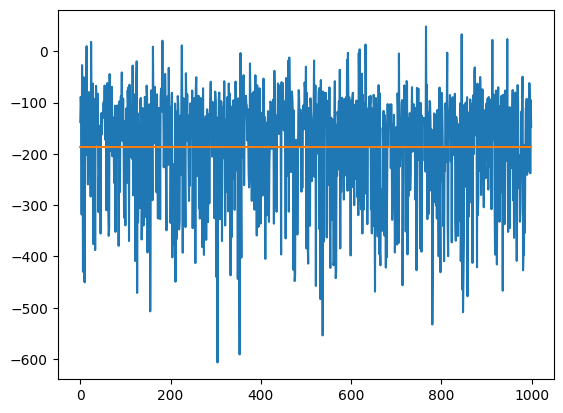

In [24]:
plt.plot(random_trials_rewards)
plt.plot([random_trials_mean] * len(random_trials_rewards))

In [28]:
def discretize(s):
    return ((s[0] + 1.5)*(10/3) // 10,
            (s[1] + 1.5)*(10/3) // 10,
            (s[2] + 5)// 10,
            (s[3] + 5)// 10,
            (10*s[4]/np.pi + 10)//10,
            (s[5] + 5)//10,
            int(s[6]),
            int(s[7]))

def epsilon_greedy(disc_state, Q, eps=0.15):
    if np.random.rand() < eps:
        return np.random.randint(0,4)
    else:
        #if Qs haven't been initialized for this state, choose to do nothing (argmax=0)
        return np.argmax(np.array([Q[disc_state+(i,)] for i in range(4)]))


def sarsa(env, alpha, num_iter, max_steps=1000):
    Q = collections.defaultdict(float)
    gamma = 0.95
    rewards = []

    for i in range(num_iter):
        obs, info = env.reset()
        d_state = discretize(obs)

        iter_reward = 0
        num_steps = 0

        #first action
        action = epsilon_greedy(d_state, Q)
        #Take steps until termination condition
        while num_steps < max_steps:
            #Take a step
            observation, reward, terminated, truncated, info = env.step(action)
            #Add R(s,a) to cumulative reward over an iteration
            iter_reward += reward
            next_state = discretize(observation)
            next_act = epsilon_greedy(next_state, Q)
            #if render: env.render()

            #Update Q value according to next state and action
            if not terminated:
                Q[d_state + (action,)] += alpha*(reward + gamma*Q[next_state+(next_act,)] - Q[d_state + (action,)])
            else:
                Q[d_state + (action,)] += alpha*(reward - Q[d_state + (action,)])
                rewards.append(iter_reward)
                break

            #update current state and action
            d_state = next_state
            action = next_act
            num_steps += 1
    return rewards, Q



In [29]:
sarsa_rewards, sarsa_Q = sarsa(env, 1E-2, 1000)
sarsa_rewards_mean = np.mean(sarsa_rewards)

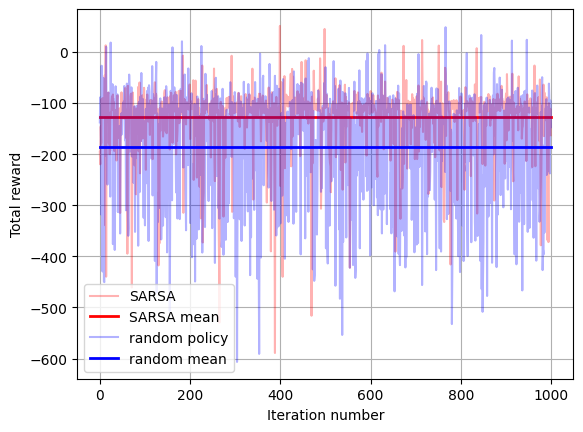

In [45]:
plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.3)
plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

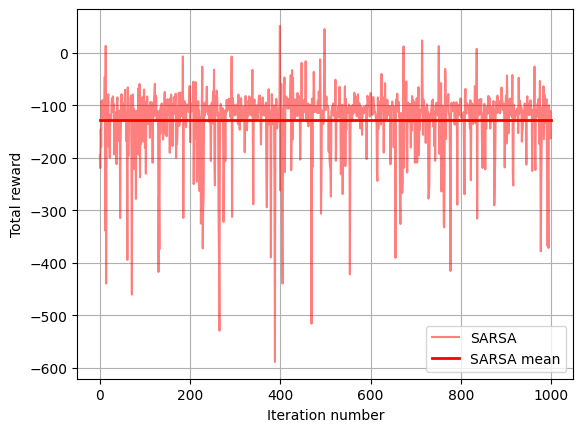

In [47]:
plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.5)
plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
#plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
#plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

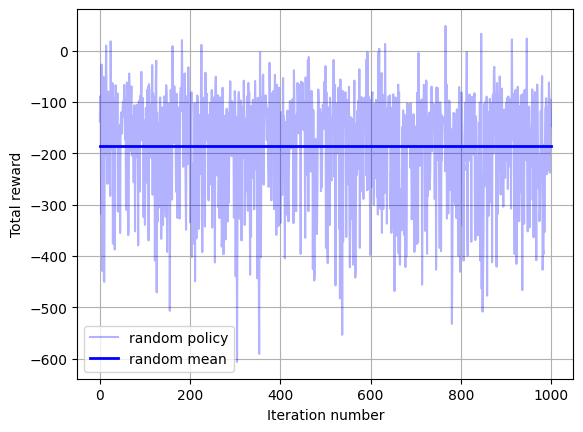

In [48]:
#plt.plot(sarsa_rewards, label='SARSA', color='r', alpha=0.5)
#plt.plot([sarsa_rewards_mean] * len(sarsa_rewards), label='SARSA mean', lw=2, color='r', alpha=1)
plt.plot(random_trials_rewards, label='random policy', color='b',alpha=0.3)
plt.plot([random_trials_mean] * len(random_trials_rewards), label='random mean', lw=2, color='b')
plt.grid()
plt.xlabel('Iteration number')
plt.ylabel('Total reward')
plt.legend()

KeyboardInterrupt: 

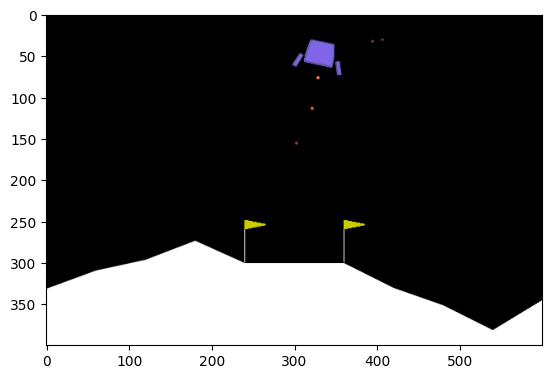

In [18]:
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env.action_space.seed(seed_num)

observation, info = env.reset(seed=seed_num)
img = plt.imshow(env.render())
for _ in range(1000):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    if terminated or truncated:
        observation, info = env.reset()
env.close()